# Imports

In [2]:
import test_module as tm
import plotly.express as px

import numpy as np
import pandas as pd
import plotly.express as px
import speclite.filters  # Johnson/Cousins Filters = bessel-*
from astropy.modeling.models import BlackBody
import astropy.units as u

data = tm.txt_to_df("_isochrone-table.txt")  # All Data
solar_metalicity_data = tm.get_metallicity(data, 0)  # Data of only Solar Matalicity
age_10gyr_data = tm.get_age(data, 10)  # Data of only stars 10 Gyr old


# Basic Isochrones

In [5]:
"""
Plot isochrone for solar metalicity stars of all ages
-- Color is set to Log_10(Age) (ranges from 1-10 Giga Years)
-- x and y axes both flipped to create positively correlated main sequence 
"""
fig1 = px.scatter(
    solar_metalicity_data,
    x="Teff",
    y="logg",
    color="Age",
    width=600,
    height=400,
    hover_data={'Teff': False, 'logg': False, 'Age': True, 'MH': False},
)
fig2 = px.scatter(
    solar_metalicity_data,
    x="Teff",
    y="logL",
    color="Age",
    width=600,
    height=400,
    hover_data={'Teff': False, 'logL': False, 'Age': True, 'MH': False},
)

fig1.update_layout(
    title="Solar Metalicity Isochrone",
    paper_bgcolor="LightSteelBlue",
    margin=dict(l=20, r=20, t=50, b=20),
)

fig2.update_layout(
    title="Solar Metalicity Isochrone",
    # xaxis=dict(autorange="reversed"),
    paper_bgcolor="LightSteelBlue",
    margin=dict(l=20, r=20, t=50, b=20),
)

fig1.update_xaxes(title="Effective Temperature [K]", range=[8100, 2000])
fig1.update_yaxes(title="Surface Gravity [dyn]", range=[6.0, -2])  # dyn = N E-5
fig1.update_coloraxes(
    colorbar_title="Age [Gyr]",
    cmin=1,
    cmax=12,
    colorbar_dtick=1,
    colorscale='Spectral',
    reversescale=True,
)
fig1.show()

fig2.update_xaxes(title="Effective Temperature [K]", range=[8100, 2000])
fig2.update_yaxes(title="Log(Luminosity) [erg/s]", range=[-4, 5])  # erg = J E-7
fig2.update_coloraxes(
    colorbar_title="Age [Gyr]",
    cmin=1,
    cmax=12,
    colorbar_dtick=1,
    colorscale='Spectral',
    reversescale=True,
)
fig2.show()


In [3]:
fig = px.scatter(
    age_10gyr_data,
    x="Teff",
    y="logL",
    color="MH",
    width=600,
    height=400,
    hover_data={"Teff": False, "logL": False, "Age": False, "MH": True},
)
fig.update_layout(
    title="Age = 10 Gyr Isochrone",
    paper_bgcolor="LightSteelBlue",
    margin=dict(l=20, r=20, t=50, b=20),
)

fig.update_coloraxes(
    colorbar_title="[M/H]",
    # cmin=1,
    # cmax=12,
    # colorbar_dtick=1,
    colorscale=['firebrick', 'seashell', 'skyblue'],
)
fig.update_xaxes(title="Effective Temperature [K]", range=[8500, 2000])
fig.update_yaxes(title="Log(Luminosity) [erg/s]", range=[-4, 4])
fig.show()


# Color-Magnitude Space 

In [4]:
fig1 = tm.plotly_isochrone(solar_metalicity_data, 'U', 'B', 'Age', 1, 12, 1)
fig2 = tm.plotly_isochrone(solar_metalicity_data, 'V', 'I', 'Age', 1, 12, 1)
fig3 = tm.plotly_isochrone(solar_metalicity_data, 'J', 'K', 'Age', 1, 12, 1)
fig1.show()
fig2.show()
fig3.show()
print(type(fig1))


<class 'plotly.graph_objs._figure.Figure'>


In [5]:
fig4 = tm.plotly_isochrone(age_10gyr_data, 'U', 'B', 'MH', -2.2, .6, 1)
fig5 = tm.plotly_isochrone(age_10gyr_data, 'V', 'I', 'MH', -2.2, .6, 1)
fig6 = tm.plotly_isochrone(age_10gyr_data, 'J', 'K', 'MH', -2.2, .6, 1)
fig4.show()
fig5.show()
fig6.show()


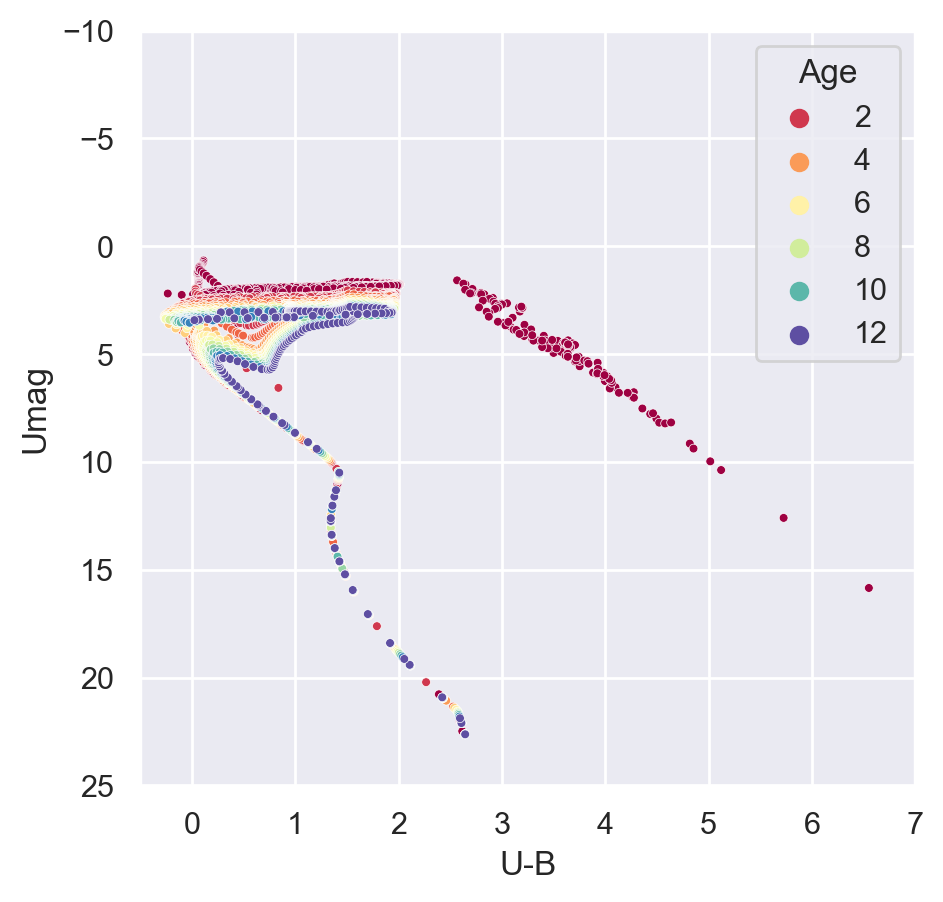

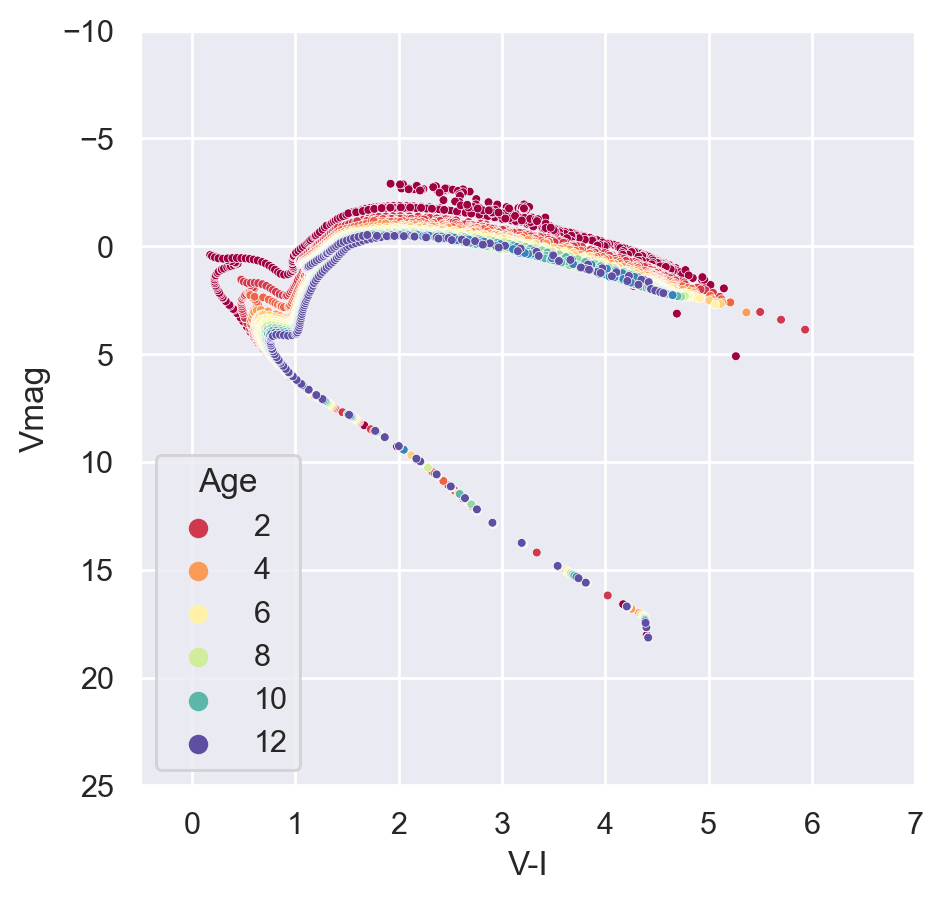

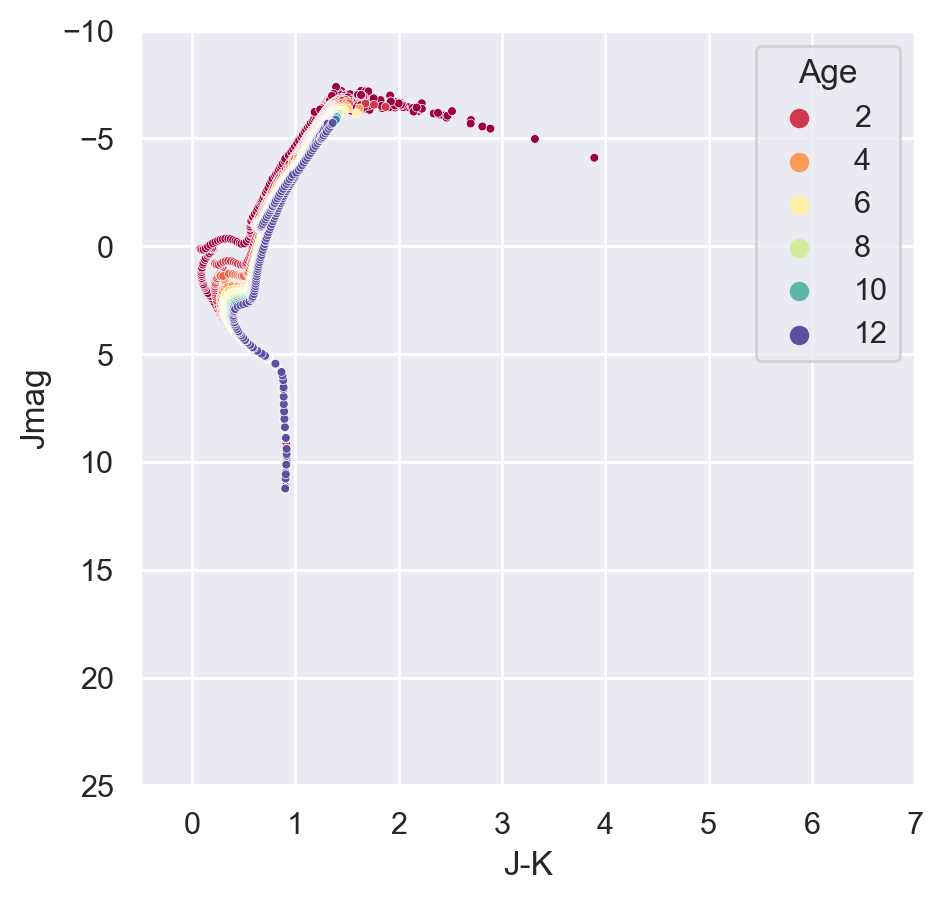

In [6]:
tm.isochrone(solar_metalicity_data, "U", "B", "Age")
tm.isochrone(solar_metalicity_data, "V", "I", "Age")
tm.isochrone(solar_metalicity_data, "J", "K", "Age");

# Blackbody Generation

In [3]:
units = u.AA # units for x axis of blackbody plots
def Blackbody_norm(wavelengths: np.array, temperature: float) -> np.array:
    bb = BlackBody(temperature=temperature * u.K)(wavelengths)
    return bb / max(bb)

In [4]:
# Generate x axis going from 2kA to 10kA in steps of 1A
wav = np.arange(1, 15000, 100) * u.AA  # wavelengths in Angstroms
wav = wav.to(units)

df = pd.DataFrame(
    {
        "wavelength": wav,
        '3k': Blackbody_norm(wav, 3000),
        "sun": Blackbody_norm(wav, 5778),
        "10k": Blackbody_norm(wav, 10000),
        "30k": Blackbody_norm(wav, 30000),
        "100k": Blackbody_norm(wav, 100000),
        "U": speclite.filters.load_filter("bessell-U")(wav),
        "B": speclite.filters.load_filter("bessell-B")(wav),
        "V": speclite.filters.load_filter("bessell-V")(wav),
        "R": speclite.filters.load_filter("bessell-R")(wav),
        "I": speclite.filters.load_filter("bessell-I")(wav),
    }
)

fig = px.line(
    df,
    x="wavelength",
    y=["sun", "U", "B", "V", "R", "I"],
    color_discrete_sequence=["black", "purple", "blue", "green", "red", "maroon"],
    hover_data={"wavelength": False, "value": False},
)

fig.update_layout(
    title="Sun's Blackbody Curve With Johnson-Cousins Filters Overlayed",
    paper_bgcolor="LightSlateGrey",
    margin=dict(l=20, r=20, t=50, b=20),
)
fig.update_xaxes(title="Wavelength [{}]".format(units))
fig.update_yaxes(title="Flux [ erg / (cm^2 Hz s sr)")


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
